In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas

/tmp/ipykernel_7612/868110576.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


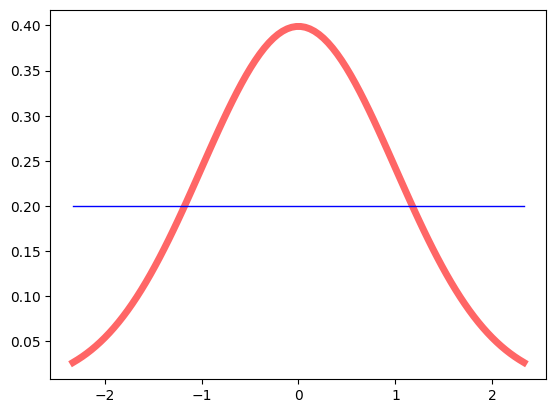

In [4]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

In [5]:
from xml.etree.ElementTree import parse, dump
# Parse the E.Coli proteome XML Document
tree = parse('data/uniprot-proteome_UP000000625.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # MANDATORY PREFIX FOR ANY SEARCH within document
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
dump(proteins[0])

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" dataset="Swiss-Prot" created="1989-10-01" modified="2020-08-12" version="166">
<ns0:accession>P11446</ns0:accession>
<ns0:accession>Q2M8Q3</ns0:accession>
<ns0:name>ARGC_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName evidence="1 4">N-acetyl-gamma-glutamyl-phosphate reductase</ns0:fullName>
<ns0:shortName evidence="1 4">AGPR</ns0:shortName>
<ns0:ecNumber evidence="1 2">1.2.1.38</ns0:ecNumber>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName evidence="1 3">N-acetyl-glutamate semialdehyde dehydrogenase</ns0:fullName>
<ns0:shortName evidence="1 3">NAGSA dehydrogenase</ns0:shortName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary" evidence="1">argC</ns0:name>
<ns0:name type="ordered locus">b3958</ns0:name>
<ns0:name type="ordered locus">JW3930</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference type="NCBI Taxonomy" 

In [6]:
# Find the xml subtree of a protein with accession "P31224"
for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        if acc.text == "P31224":
            dump(entry)
            break

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" dataset="Swiss-Prot" created="1993-07-01" modified="2020-08-12" version="187">
<ns0:accession>P31224</ns0:accession>
<ns0:accession>Q2MBW5</ns0:accession>
<ns0:name>ACRB_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName>Multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName>AcrAB-TolC multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:alternativeName>
<ns0:alternativeName>
<ns0:fullName>Acridine resistance protein B</ns0:fullName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary">acrB</ns0:name>
<ns0:name type="synonym">acrE</ns0:name>
<ns0:name type="ordered locus">b0462</ns0:name>
<ns0:name type="ordered locus">JW0451</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference type="NCBI Taxonomy" id="83333" />
<ns0:lineage>
<ns0:taxon>Bacteria</ns0:taxon>
<ns0:taxon>Proteo

In [7]:
df = pandas.read_csv("data/TCL_wt1.tsv", sep='\t', na_values='#VALEUR!')
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape

(2024, 7)

In [9]:
df.head()

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075817,-3.721335,0.000055,4.260067
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810,-3.429569,0.000351,3.454627
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614,-3.284695,0.000027,4.571899
3,P0CE48,Elongation factor Tu 2 OS=Escherichia coli (st...,tufB,NaN,NaN,NaN,NaN
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108497,-3.204277,0.019963,1.699768


In [10]:
df.columns

Index(['Accession', 'Description', 'Gene Symbol',
       'Corrected Abundance ratio (1.53)', 'Log2 Corrected Abundance Ratio',
       'Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)',
       '-LOG10 Adj.P-val'],
      dtype='object')

In [11]:
df.dtypes

Accession                                                        object
Description                                                      object
Gene Symbol                                                      object
Corrected Abundance ratio (1.53)                                float64
Log2 Corrected Abundance Ratio                                  float64
Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)    float64
-LOG10 Adj.P-val                                                float64
dtype: object

In [12]:
df.info

<bound method DataFrame.info of      Accession                                        Description Gene Symbol   
0       P75936  Basal-body rod modification protein FlgD OS=Es...        flgD  \
1       P76231  Uncharacterized protein YeaC OS=Escherichia co...        yeaC   
2       P0A8S9  Flagellar transcriptional regulator FlhD OS=Es...        flhD   
3       P0CE48  Elongation factor Tu 2 OS=Escherichia coli (st...        tufB   
4       P05706  PTS system glucitol/sorbitol-specific EIIA com...        srlB   
...        ...                                                ...         ...   
2019    P24240  6-phospho-beta-glucosidase AscB OS=Escherichia...        ascB   
2020    P0A917  Outer membrane protein X OS=Escherichia coli (...        ompX   
2021    P02931  Outer membrane protein F OS=Escherichia coli (...        ompF   
2022    P0AB40  Multiple stress resistance protein BhsA OS=Esc...        bhsA   
2023    P76042  Putative ABC transporter periplasmic-binding p...        ycjN

In [13]:
df.describe()

,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
count,1892.000000,1892.000000,1.750000e+03,1750.000000
mean,0.668382,-0.646713,8.238311e-01,0.383981
std,0.184241,0.467234,3.506349e-01,1.066602
min,0.075817,-3.721335,1.034030e-08,0.000000
25%,0.560784,-0.834482,1.000000e+00,0.000000
50%,0.693791,-0.527427,1.000000e+00,0.000000
75%,0.778595,-0.361056,1.000000e+00,0.000000
max,1.798039,0.846424,1.000000e+00,7.985468


In [14]:
df2 = df.dropna()

In [15]:
values = df2[['Description', 'Accession']]


In [16]:
type(values)

pandas.core.frame.DataFrame

In [17]:
values

,Description,Accession
0,Basal-body rod modification protein FlgD OS=Es...,P75936
1,Uncharacterized protein YeaC OS=Escherichia co...,P76231
2,Flagellar transcriptional regulator FlhD OS=Es...,P0A8S9
4,PTS system glucitol/sorbitol-specific EIIA com...,P05706
5,Flagellar hook-associated protein 3 OS=Escheri...,P29744
...,...,...
2011,Prophage lipoprotein Bor homolog OS=Escherichi...,P77330
2016,Outer membrane protein TolC OS=Escherichia col...,P02930
2020,Outer membrane protein X OS=Escherichia coli (...,P0A917
2021,Outer membrane protein F OS=Escherichia coli (...,P02931


In [18]:
values[0:2]

,Description,Accession
0,Basal-body rod modification protein FlgD OS=Es...,P75936
1,Uncharacterized protein YeaC OS=Escherichia co...,P76231


In [19]:
values.shape

(1746, 2)

In [20]:
df2.iloc[:5,[0,2,3]]

,Accession,Gene Symbol,Corrected Abundance ratio (1.53)
0,P75936,flgD,0.075817
1,P76231,yeaC,0.092810
2,P0A8S9,flhD,0.102614
4,P05706,srlB,0.108497
5,P29744,flgL,0.124183


In [21]:
df.loc[(df['-LOG10 Adj.P-val'] > 0 )  & (df['Log2 Corrected Abundance Ratio'] > 0.0 ) ]

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
1938,P68919,50S ribosomal protein L25 OS=Escherichia coli ...,rplY,1.010458,0.015009,2.035974e-01,0.691228
1939,P0ACG1,DNA-binding protein StpA OS=Escherichia coli (...,stpA,1.013072,0.018737,1.936673e-01,0.712944
1940,P0A903,Outer membrane protein assembly factor BamC OS...,bamC,1.020915,0.029863,3.957145e-01,0.402618
1945,P0ADE4,Translocation and assembly module subunit TamA...,tamA; ytfM,1.024183,0.034474,2.625522e-03,2.580784
1946,P02943,Maltoporin OS=Escherichia coli (strain K12) OX...,lamB,1.030065,0.042736,3.135847e-03,2.503645
1947,P77774,Outer membrane protein assembly factor BamB OS...,bamB,1.035294,0.050041,4.857703e-01,0.313569
1948,P0A940,Outer membrane protein assembly factor BamA OS...,bamA,1.039869,0.056402,1.228502e-01,0.910624
1955,P0AEQ1,Protein GlcG OS=Escherichia coli (strain K12) ...,glcG,1.050327,0.070838,2.177041e-02,1.662133
1957,P09169,Protease 7 OS=Escherichia coli (strain K12) OX...,ompT,1.052288,0.073529,1.085198e-01,0.964491
1962,P05825,Ferrienterobactin receptor OS=Escherichia coli...,fepA,1.076471,0.106309,1.524348e-02,1.816916


In [22]:
df2.loc[(df['-LOG10 Adj.P-val'] > 0.68 )  & (df2['Log2 Corrected Abundance Ratio'] > 0.0 ) ]

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
1938,P68919,50S ribosomal protein L25 OS=Escherichia coli ...,rplY,1.010458,0.015009,2.035974e-01,0.691228
1939,P0ACG1,DNA-binding protein StpA OS=Escherichia coli (...,stpA,1.013072,0.018737,1.936673e-01,0.712944
1945,P0ADE4,Translocation and assembly module subunit TamA...,tamA; ytfM,1.024183,0.034474,2.625522e-03,2.580784
1946,P02943,Maltoporin OS=Escherichia coli (strain K12) OX...,lamB,1.030065,0.042736,3.135847e-03,2.503645
1948,P0A940,Outer membrane protein assembly factor BamA OS...,bamA,1.039869,0.056402,1.228502e-01,0.910624
1955,P0AEQ1,Protein GlcG OS=Escherichia coli (strain K12) ...,glcG,1.050327,0.070838,2.177041e-02,1.662133
1957,P09169,Protease 7 OS=Escherichia coli (strain K12) OX...,ompT,1.052288,0.073529,1.085198e-01,0.964491
1962,P05825,Ferrienterobactin receptor OS=Escherichia coli...,fepA,1.076471,0.106309,1.524348e-02,1.816916
1967,P39180,Antigen 43 OS=Escherichia coli (strain K12) OX...,flu,1.082353,0.114171,2.560931e-03,2.591602
1968,P0ACF8,DNA-binding protein H-NS OS=Escherichia coli (...,hns,1.083007,0.115042,2.679790e-05,4.571899


In [23]:
mu= np.mean(df2["Log2 Corrected Abundance Ratio"])
sigma = np.std(df2["Log2 Corrected Abundance Ratio"])
mu,sigma

(-0.63862621564433, 0.47062451611275274)

/tmp/ipykernel_7612/457671016.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


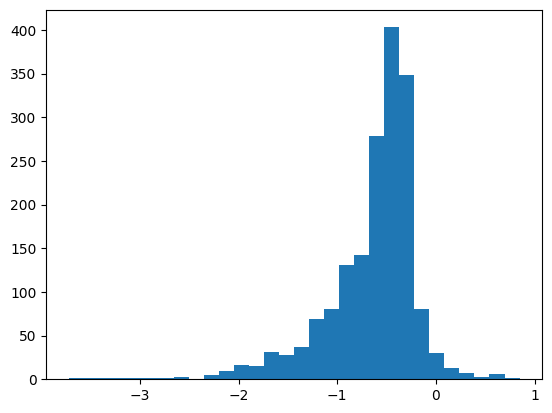

In [24]:


fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.hist(df2.iloc[:,4] , bins=30)

fig.show()

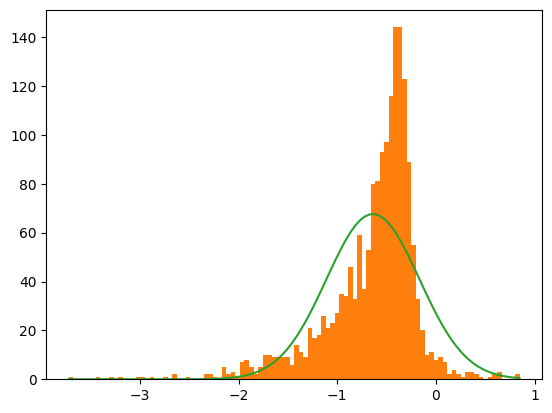

In [25]:
fig2, ax2 = plt.subplots()
x = np.linspace(min(df2.iloc[:,4]),max(df2.iloc[:,4]),100)
hist  = ax2.hist(df2.iloc[:,4],bins=100)
dx = hist[1][1] - hist[1][0]
scale = len(df2.iloc[:,4] )*dx

ax2.hist(df2.iloc[:,4], bins=100)

ax2.plot(x, norm.pdf(x,mu,sigma)*scale)


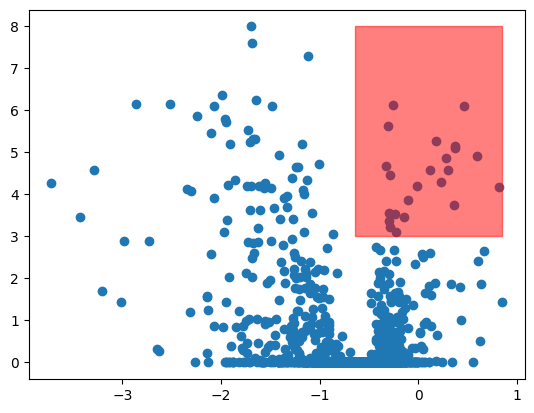

In [26]:


from matplotlib.patches import Rectangle
x_lim, y_lim = mu, 3 #choix arbitraire pour 3 : a transformer avec le -log 
fig3, ax3 = plt.subplots()
_= ax3.scatter(df2.iloc[:,4] ,df2.iloc[:,6])
w,h = max(df2.iloc[:,4]) - x_lim, max(df2.iloc[:,6]) - y_lim
_= ax3.add_patch( Rectangle( (x_lim,y_lim), w, h, alpha = 0.5, color = 'r' )  )

In [27]:
df3 = df.loc[(df['-LOG10 Adj.P-val'] > 3 )  & (df['Log2 Corrected Abundance Ratio'] > mu) ]
len(df3)

23

In [43]:
df3['Accession'].tolist()
print(len(df3['Accession'].tolist()))

23


In [29]:
from xml.etree.ElementTree import parse, dump

def getAccessionGOTerms(xmlFile, accession):
    tree = parse(xmlFile)
    root = tree.getroot()
    ns = '{http://uniprot.org/uniprot}'
    
    match_go_terms = []
    proteins = root.findall(ns + 'entry')
    for entry in proteins:
        accessions = entry.findall(ns+"accession")
        current_accessions = [ acc.text for acc in accessions ]
        if not accession in current_accessions:
            continue
        goTerms = entry.findall('{http://uniprot.org/uniprot}dbReference[@type="GO"]')
        #goTerms = xmlEntry.findall(ns +'dbReference[@type="GO"]')
        for goT in goTerms:
            gID   = goT.attrib['id']
            gName = goT.find(ns +'property[@type="term"]').attrib['value']
            match_go_terms.append((gID, gName))
        break
    return match_go_terms


In [63]:
go_term_dico = {}


for prot in df3['Accession'].tolist():
    #print(str(prot))
    go_term_of_prot = getAccessionGOTerms("./data/uniprot-proteome_UP000000625.xml", prot)

    for tuple in go_term_of_prot:
        if tuple[0] not in go_term_dico.keys():
            go_term_dico[tuple[0]]={'ID':tuple[0],'name':tuple[1],'carried_by':[prot]}
        else:
            go_term_dico[tuple[0]]['carried_by'].append(prot)

print(go_term_dico)

{'GO:0005737': {'ID': 'GO:0005737', 'name': 'C:cytoplasm', 'carried_by': ['P23721', 'P0A7G6', 'P0A6M8']}, 'GO:0005829': {'ID': 'GO:0005829', 'name': 'C:cytosol', 'carried_by': ['P23721', 'P0A6K6', 'P0A799', 'P0A6F3', 'P25745', 'P0A6M8', 'P0A6L0', 'P0A8V6', 'P0A9Q1', 'P02358', 'P0ACF8', 'P62399', 'P76344']}, 'GO:0004648': {'ID': 'GO:0004648', 'name': 'F:O-phospho-L-serine:2-oxoglutarate aminotransferase activity', 'carried_by': ['P23721']}, 'GO:0030170': {'ID': 'GO:0030170', 'name': 'F:pyridoxal phosphate binding', 'carried_by': ['P23721']}, 'GO:0006564': {'ID': 'GO:0006564', 'name': 'P:L-serine biosynthetic process', 'carried_by': ['P23721']}, 'GO:0006563': {'ID': 'GO:0006563', 'name': 'P:L-serine metabolic process', 'carried_by': ['P23721']}, 'GO:0033359': {'ID': 'GO:0033359', 'name': 'P:lysine biosynthetic process via diaminopimelate and N-succinyl-2-amino-6-ketopimelate', 'carried_by': ['P23721']}, 'GO:0042823': {'ID': 'GO:0042823', 'name': 'P:pyridoxal phosphate biosynthetic proces

In [ ]:
"""
Nous évaluerons la significativité de la présence de tous les termes GO 
portés par les protéines surabondantes

parametrez la loi hypergeometrique et 
calculez la pvalue de chaque terme GO portés par les protéines surabondantes.

Exemple:
Supposons que nous ayons une collection de 20 animaux, dont 7 sont des chiens. 
Ensuite, si nous voulons connaître la probabilité de trouver un nombre de chiens donné
si nous choisir au hasard 12 des 20 animaux,
[M, n, N] = [20, 7, 12]
"""


In [85]:
p_valeurs = {}
for key in go_term_dico:
    #print(key)
    definition = go_term_dico[key]['name']
    occurence = len(go_term_dico[key]['carried_by'])

    [M, n, N] = [4391, 23, len(go_term_dico[key]['carried_by'])]
    
    p_valeur = hypergeom.sf(N-1, M, n, N)
    p_valeurs[key]= [p_valeur,definition,occurence]

for key in p_valeurs:
    print(f" {key} | {p_valeurs[key][1]} | {p_valeurs[key][2]} | {p_valeurs[key][0]}")

 GO:0005737 | C:cytoplasm | 3 | 1.2559613454414923e-07
 GO:0005829 | C:cytosol | 13 | 3.214612882512603e-32
 GO:0004648 | F:O-phospho-L-serine:2-oxoglutarate aminotransferase activity | 1 | 0.005237986791163744
 GO:0030170 | F:pyridoxal phosphate binding | 1 | 0.005237986791163744
 GO:0006564 | P:L-serine biosynthetic process | 1 | 0.005237986791163744
 GO:0006563 | P:L-serine metabolic process | 1 | 0.005237986791163744
 GO:0033359 | P:lysine biosynthetic process via diaminopimelate and N-succinyl-2-amino-6-ketopimelate | 1 | 0.005237986791163744
 GO:0042823 | P:pyridoxal phosphate biosynthetic process | 1 | 0.005237986791163744
 GO:0008615 | P:pyridoxine biosynthetic process | 1 | 0.005237986791163744
 GO:0005886 | C:plasma membrane | 1 | 0.005237986791163744
 GO:0042802 | F:identical protein binding | 6 | 1.017488465025204e-14
 GO:0000287 | F:magnesium ion binding | 1 | 0.005237986791163744
 GO:0030145 | F:manganese ion binding | 1 | 0.005237986791163744
 GO:0008973 | F:phosphopento